In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/mobile_addiction_modified.csv'
df=pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.shape

(13589, 12)

In [ ]:
df.describe()

,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,Addiction Score
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048,52.998189
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790,17.330196
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000,10.692000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000,38.016000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000,52.635000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000,67.749000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000,100.122000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          13589 non-null  int64  
 1   daily_screen_time   13589 non-null  int64  
 2   app_sessions        13589 non-null  int64  
 3   social_media_usage  13589 non-null  int64  
 4   gaming_time         13589 non-null  int64  
 5   notifications       13589 non-null  int64  
 6   night_usage         13589 non-null  int64  
 7   age                 13589 non-null  int64  
 8   work_study_hours    13589 non-null  int64  
 9   stress_level        13589 non-null  int64  
 10  apps_installed      13589 non-null  int64  
 11  Addiction Score     13589 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 1.2 MB


In [ ]:
df = df.select_dtypes(include=['number'])
df = df.drop(['Unnamed: 0'], axis=1)
df.head()



,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,Addiction Score
0,2,29,0,0,49,0,44,5,3,35,28.281
1,6,29,1,2,65,1,29,5,9,21,73.920
2,9,28,2,0,57,3,28,7,5,39,62.568
3,6,39,2,0,69,1,28,6,8,24,73.392
4,5,37,3,1,64,2,27,4,5,26,71.082


# Regression

- Built-In Linear Regression (from lec)
- Built-In Ridge Regression (from lec)
- Built-In Polynomial regression (from lec)

- Manual Ridge Regression (from lec)
- Manual Polynomial regression (from lec)
- Decision Tree Regression
- Manual Locally Weighted Regression (LWR)

In [ ]:
import numpy as np

def print_metrics(y_true, y_pred, label):
    # Regression metrics
    mse  = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae  = np.mean(np.abs(y_true - y_pred))
    r2   = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

    print(
        f"{label} → "
        f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f};  "
    )


## Built-In Regression

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and Target (y)
X = df.drop(columns=["Addiction Score"])
y = df["Addiction Score"]

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the data using normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Built-In Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Train the Linear Regression model
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)

y_pred_LR = LR_model.predict(X_test_scaled)

mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print("Linear Regression:")
print("MSE: ", mse_LR)
print("R2: ", r2_LR)


Linear Regression:
MSE:  1.1359016563581966e-28
R2:  1.0


## Built-In Polynomial Regression

In [ ]:
# Define the degree of the polynomial
poly = PolynomialFeatures(degree=2)

# Transform the scaled features into polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict using the polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression (degree=2):")
print("MSE: ", mse_poly)
print("R2: ", r2_poly)


Polynomial Regression (degree=2):
MSE:  5.657403923239978e-28
R2:  1.0


## Built-In Ridge Regression

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define alpha range
alpha_values = [0.0001 * (10 ** i) for i in range(8)]

# Function to train Ridge model and show results
def ridge_interactive(alpha_index):
    alpha = alpha_values[alpha_index]

    # Train model
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display scores
    clear_output(wait=True)
    print(f"Alpha = {alpha:.5f}")
    print(f"MSE = {mse:.5f}")
    print(f"R² = {r2:.5f}")

    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Ridge Regression (alpha = {alpha:.5f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create slider for alpha selection
alpha_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(alpha_values) - 1,
    step=1,
    description='Alpha index:',
    style={'description_width': 'initial'}
)

# Create interactive output
widgets.interact(ridge_interactive, alpha_index=alpha_slider)


interactive(children=(IntSlider(value=0, description='Alpha index:', max=7, style=SliderStyle(description_widt…

<function __main__.ridge_interactive(alpha_index)>

## Manual Ridge Regression (from Lec)

In [ ]:
# Separate features and target
X = df.drop(columns=['Addiction Score'])
y = df['Addiction Score'].values

# Add bias (intercept) term
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# Ridge weights (with alpha = 10, no regularization on intercept)
alpha = 10
I = np.eye(X.shape[1])
I[0, 0] = 0  # Don't regularize intercept
w_ridge = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
y_pred_ridge = X @ w_ridge

print("\nRidge Weights (alpha=10):", w_ridge)
print_metrics(y, y_pred_ridge, 'Ridge regression')



Ridge Weights (alpha=10): [-2.58604926e-03  1.64975095e+00  4.29101152e-01  2.63871325e+00
  2.96775782e+00  4.95118697e-01  2.96749721e+00 -1.65034324e-01
 -6.59984914e-01  2.30980015e+00 -2.30925694e-01]
Ridge regression → MSE: 0.0000, RMSE: 0.0037, MAE: 0.0029, R²: 1.0000;  


## Polynomial regression (from lec)

In [ ]:
# Assuming X has the bias column already
X_base = df.drop(columns=['Addiction Score']).values
y = df['Addiction Score'].values

# Start with bias term
poly_X = [np.ones(X_base.shape[0])]

for i in range(X_base.shape[1]):
    poly_X.append(X_base[:, i])

for i in range(2, 4):
    poly_X.append(X_base**i)

# Stack horizontally to form the final feature matrix
X_poly = np.column_stack(poly_X)


# Normal Equation
beta_hat = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

y_pred = X_poly @ beta_hat

print("polynomial regression:", beta_hat)
print_metrics(y, y_pred_ridge, 'Polynomial Regression')



polynomial regression: [ 4.51915729e-09  1.65000000e+00  4.29000000e-01  2.63999999e+00
  2.97000001e+00  4.95000000e-01  2.97000001e+00 -1.65000000e-01
 -6.60000000e-01  2.31000000e+00 -2.31000000e-01 -9.46221112e-12
 -2.82576508e-13  3.12803635e-11  7.92034977e-10 -5.69652074e-14
  6.89243193e-12  1.60413632e-13 -7.96853126e-13  1.09130675e-12
  5.97480362e-13  7.66893482e-13 -5.18610903e-15 -4.55059455e-12
  3.63997999e-13 -1.09040591e-15 -1.22479666e-12 -2.46416147e-16
  2.64337926e-14 -2.81806735e-14 -4.55523171e-15]
Polynomial Regression → MSE: 0.0000, RMSE: 0.0037, MAE: 0.0029, R²: 1.0000;  


## Decision Tree Regression

Decision Tree Regression → MSE: 52.7735, RMSE: 7.2645, MAE: 5.6574, R²: 0.8245;  


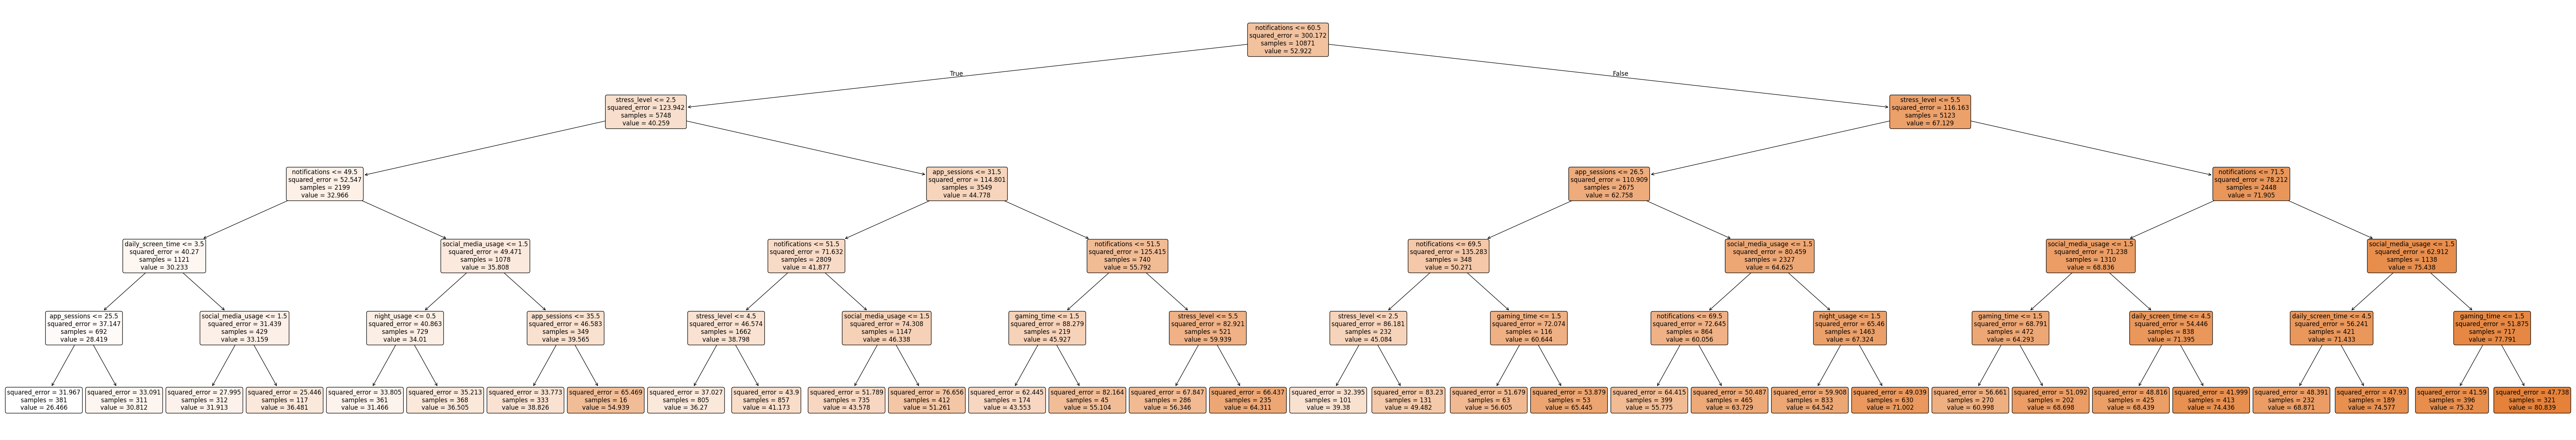

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 1. Prepare your data
X = df.drop(columns=['Addiction Score']).values  # shape (n_samples, n_features)
y = df['Addiction Score'].values                 # shape (n_samples,)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Instantiate and fit the model
dt = DecisionTreeRegressor(
    max_depth=5,        # you can tune this
    min_samples_leaf=5,  # and this
    random_state=42
)
dt.fit(X_train, y_train)

# 4. Predict
y_pred_train = dt.predict(X_train)
y_pred_test  = dt.predict(X_test)

print_metrics(y_test,  y_pred_test,  "Decision Tree Regression")

# 3. Plot the tree with a bigger figure and tight layout
plt.figure(figsize=(70, 12))          # make the figure large enough
plot_tree(
    dt,
    feature_names=df.drop(columns=['Addiction Score']).columns,
    filled=True,
    rounded=True,
    fontsize=12                       # a bit smaller text can help
)
plt.tight_layout()                    # adjust margins to prevent overlap
plt.show()


#### Explanation for the root node

notifications <= 60.5
This is the split condition at this node: any sample whose notifications feature is ≤ 60.5 will follow the left branch, and the others go right.

squared_error = 300.172
This is the node’s impurity, measured as the mean-squared error (MSE) of the target values if you were to predict every sample here by the same constant. In other words, if you predict each of these 10 871 samples by the node’s average (52.922, see below), you’d incur on average a squared error of 300.172.

samples = 10871
There are 10 871 training examples that satisfy notifications <= 60.5 and have reached this node.

value = 52.922
This is the node’s prediction, i.e. the mean of the target (Addiction Score, or whatever you’re predicting) over those 10 871 samples.

## Locally Weighted Regression (LWR)

In [ ]:
import numpy as np
from numpy.linalg import solve

m, d = X_base.shape
X = np.hstack([np.ones((m,1)), X_base])    # design matrix with bias
tau = 1.0
y_pred = np.empty(m)

for i in range(m):
    x_q = X[i]                              # query point

    diffs    = X - x_q
    sq_dists = np.einsum('ij,ij->i', diffs, diffs)
    w        = np.exp(-sq_dists/(2*tau*tau))
    sqrt_w   = np.sqrt(w)

    # weight the rows without forming a big diag matrix
    Xw = X * sqrt_w[:, None]                # shape (m, d+1)
    yw = y * sqrt_w                         # shape (m,)

    # normal equations with ridge regularization (λ = 1e-5 here)
    XtWX = Xw.T @ Xw                        # shape (d+1, d+1)
    XtWy = Xw.T @ yw                        # shape (d+1,)

    λ = 1e-5
    ridge = λ * np.eye(d+1)
    beta  = solve(XtWX + ridge, XtWy)       # stabilized solve

    y_pred[i] = x_q @ beta

print_metrics(y, y_pred, "Locally Weighted Regression")

Locally Weighted Regression → MSE: 0.0000, RMSE: 0.0000, MAE: 0.0000, R²: 1.0000;  


## 1. Query-point problem  
Fit a separate linear model around each query point $x^*$ rather than globally.

## 2. Gaussian weights  
$$
w_i = \exp\bigl(-\frac{\|x_i - x^*\|^2}{2\tau^2}\bigr) \quad (2.1)
$$  
where $\tau$ is the bandwidth.

## 3. Weighted normal equations  
Let $X\in\mathbb{R}^{m\times(d+1)}$ (with a leading column of 1’s) and $y\in\mathbb{R}^m$. Define  
$$
X_w = \mathrm{diag}(\sqrt{w})\,X,\quad y_w = \mathrm{diag}(\sqrt{w})\,y \quad (3.1)
$$  
Then  
$$
\beta(x^*) = (X_w^\top X_w)^{-1}X_w^\top y_w \quad (3.2)
$$

## 4. Ridge regularization  (we need it when weights are so small, and inverting the matrix gives errors)
To stabilize inversion, add $\lambda I$:  
$$
\beta(x^*) = (X_w^\top X_w + \lambda I)^{-1}X_w^\top y_w \quad (4.1)
$$

## 5. Prediction  
$$
\hat y(x^*) = x^{*\top}\beta(x^*) \quad (5.1)
$$

Running this for each of the $m$ points yields the fitted vector $\hat y\in\mathbb{R}^m$.


# Clustering using K-means and KNN